## Assignment 2A

### Problem 1 (40 points)
Write a program, or modify an earlier one, to once more calculate the value of the integral:
$$\int_0^2\left(x^4-2x+1\right)\ dx$$
using (a) trapezoidal rule and (b) Simpson rule. In both cases use 20 slices, but this time have the program also print an estimate of the error on the result, calculated using the method discussed in class, i.e., using the equations:
$$\begin{align}
\epsilon_1&=ch_1^2=\dfrac{1}{3}(I_2-I_1) & \epsilon_2&=ch_2^2=\dfrac{1}{15}(I_2-I_1)
\end{align}$$
To do this you will need to evaluate the integral twice, once with $N_1=10$ slices and then again with $N_2=20$ slices. Then the equation given above gives the error. How does the error calculated in this manner compare with a direct computation of the error as the difference between your value for the integral and the true value of 4.4? Why do the two not agree perfectly?

In [36]:
# Packages
import numpy as np

# Integration Functions
def trapezoid(f, a: float|int, b: float|int, N: int) -> float:
    assert callable(f)
    assert isinstance(a, (int, float))
    assert isinstance(b, (int, float))
    assert isinstance(N, int)
    x = np.linspace(a, b, N+1)
    return np.sum(f(x[1:]) + f(x[:-1])) * (b-a)/(2*N)
def simpson(f, a: float|int, b: float|int, N: int) -> float:
    assert callable(f)
    assert isinstance(a, (int, float))
    assert isinstance(b, (int, float))
    assert isinstance(N, int)
    assert N % 2 == 0
    x = np.linspace(a, b, N+1)
    return np.sum(f(x[:-2:2]) + 4*f(x[1:-1:2]) + f(x[2::2])) * (b-a)/(3*N)

# Problem Parameters
f = lambda x: x**4 - 2*x + 1
F = lambda x: x**5/5 - x**2 + x
a: int = 0
b: int = 2

# Integrations
analytic = F(b) - F(a)
trapezoid_10 = trapezoid(f, a, b, 10)
trapezoid_20 = trapezoid(f, a, b, 20)
simpson_10 = simpson(f, a, b, 10)
simpson_20 = simpson(f, a, b, 20)

# Error Calculations
trapezoid_20_error = abs(trapezoid_20-trapezoid_10)/3
simpson_20_error = abs(simpson_20-simpson_10)/15

# Printouts
print(f"Analytic        : {analytic}")
print(f"Trapezoid (N=20): {trapezoid_20:.3f} ± {trapezoid_20_error:.9f}")
print(f"Simpson   (N=20): {simpson_20:.3f} ± {simpson_20_error:.9f}")
print(f"Exact Errors:")
print(f"Trapezoid       : {abs(analytic-trapezoid_20):.9f}")
print(f"Simpson         : {abs(analytic-simpson_20):.9f}")


Analytic        : 4.4
Trapezoid (N=20): 4.427 ± -0.026633333
Simpson   (N=20): 4.400 ± -0.000026667
Exact Errors:
Trapezoid       : 0.026660000
Simpson         : 0.000026667


How does the error calculated in this manner compare with a direct computation of the error as the difference between your value for the integral and the true value of 4.4?
> The exact calculation of error is almost exactly the same as the true error, on the order of $10^{-4}$ and $10^{-6}$ for trapezoid and simpson's respectively. I noticed that the true error is just a tiny bit larger than the calculated error, but I'm willing to bet the difference goes to 0 as you find the asymtotic limit of calculated error.

Why do the two not agree perfectly?
> The cutoff for the order of the error is responsible for the remainder of the error, but it's small enough to be effectively 0. Also, the approximation is negative since it's always a slight underestimate, and with more higher terms it would equally it exactly in the limit.

### Problem 2 (60 points)
Given below is a differential equation:
$$\dfrac{dx}{dt}=-x^3+\sin(t)$$
with the initial condition $x=0$ at $t=0$.

#### Problem 2.A
Write a program that uses Euler’s method (1st order R-K method) to solve the differential equation. Calculate from $t = 0$ to $t = 40$ using a reasonable number of steps. Plot the numerical results.

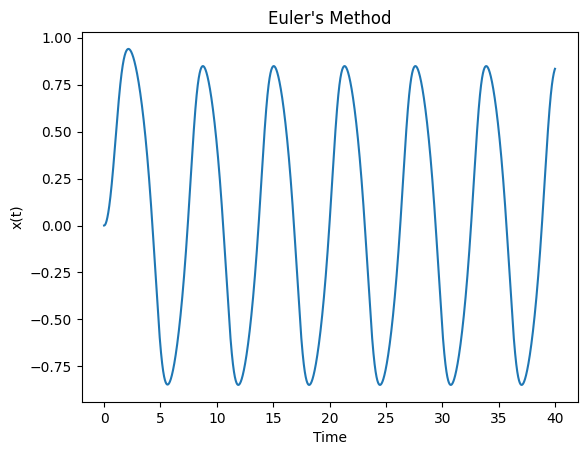

In [37]:
# Euler's Method
def eulers_method(f, init_2d: tuple[float | int], t: float | int, dt: float | int) -> float:
    assert callable(f)
    assert isinstance(init_2d, tuple)
    assert len(init_2d) == 2
    assert isinstance(init_2d[0], (int, float))
    assert isinstance(init_2d[1], (int, float))
    assert isinstance(t, (int, float))
    assert isinstance(dt, (int, float))
    t0, x = init_2d
    time = np.arange(t0, t, dt)
    for t in time:
        x += f(t, x)*dt
    return x
def eulers_method_iter(f, init_2d: tuple[float | int], tf: float | int, dt: float | int) -> float:
    assert callable(f)
    assert isinstance(init_2d, tuple)
    assert len(init_2d) == 2
    assert isinstance(init_2d[0], (int, float))
    assert isinstance(init_2d[1], (int, float))
    assert isinstance(tf, (int, float))
    assert isinstance(dt, (int, float))
    t0, x0 = init_2d
    time = np.arange(t0, tf, dt)
    x = [x0]
    for t in time:
        x.append(x[-1] + f(t, x[-1])*dt)
    return x

# Problem Parameters
init_2d = (0, 0)
def f(t, x):
    return -x**3 + np.sin(t)

# Euler's Method
dt = 1e-5
tf = 40
t = np.arange(init_2d[0], tf+dt, dt)
x_t = eulers_method_iter(f, init_2d, tf, dt)

# Plot the function
import matplotlib.pyplot as plt
plt.plot(t, x_t)
plt.xlabel("Time")
plt.ylabel("x(t)")
plt.title("Euler's Method")
plt.show()

#### Problem 2.B
If everything is correct, you should find that, for large $t$, the solution roughly behaves as:
$$x(t)\approx R\sin(t+\phi)$$
where $R=0.86976$ and $\phi = −1.054719$. However, there will be small deviations from such a single-harmonic behavior, due to the non-linearity of the system. Plot the numerical results along with the approximation above for the large-$t$ asymptotic behavior.

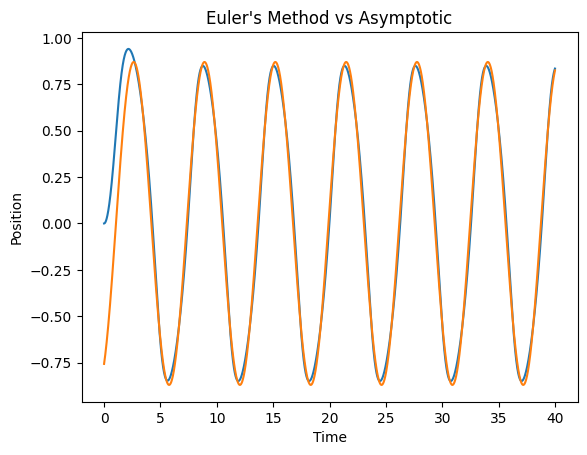

In [38]:
# Plot the function
import matplotlib.pyplot as plt
plt.plot(t, x_t, label="Euler's Method")
plt.plot(t, 0.86976*np.sin(t-1.054719), label="Asymtotic")
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Euler's Method vs Asymptotic")
plt.show()